In [35]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Reading the Data**

In [88]:
#import libraries and read the data
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/ML_2_Fellow.csv', encoding='iso-8859-1')
dataset.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


# **Data Preprocessing**

In [124]:
# checking the type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        541909 non-null  object 
 2   Barang             541909 non-null  object 
 3   Jumlah             541909 non-null  float64
 4   Tanggal_Transaksi  541909 non-null  object 
 5   Harga_Satuan       541909 non-null  float64
 6   Kode_Pelanggan     541909 non-null  float64
 7   Negara             541909 non-null  object 
 8   Total              541909 non-null  float64
dtypes: float64(4), object(5)
memory usage: 37.2+ MB


In [4]:
# describe data holistically, found anomaly on 'count' and 'min'
dataset.describe()

,Jumlah,Harga_Satuan,Kode_Pelanggan
count,535874.000000,535874.000000,403182.000000
mean,9.587927,4.636533,15287.687868
std,153.292222,97.302232,1714.009551
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13952.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,74215.000000,38970.000000,18287.000000


In [64]:
# time evaluation because the data sorted by time
import datetime 

start=str(dataset['Tanggal_Transaksi'].iloc[0])
format = '%d/%m/%Y %H:%M'
startDateTime = datetime.datetime.strptime(start, format)
end=str(dataset['Tanggal_Transaksi'].iloc[-1])
endDateTime = datetime.datetime.strptime(end, format)
diff = endDateTime - startDateTime
print('sales data evaluated for = {0} or approximated in 20 months'.format(diff))

sales data evaluated for = 608 days, 4:24:00 or approximated in 20 months


In [112]:
# checking for null value
dataset.isnull().sum()

Kode_Bayar           0
Kode_Barang          0
Barang               0
Jumlah               0
Tanggal_Transaksi    0
Harga_Satuan         0
Kode_Pelanggan       0
Negara               0
dtype: int64

Fill all the null value with approriate value

In [107]:
dataset['Jumlah'] = dataset['Jumlah'].fillna(0) #assume it's a mistake
dataset['Harga_Satuan'] = dataset['Harga_Satuan'].fillna(dataset['Harga_Satuan'].median()) #median price
dataset['Kode_Pelanggan'] = dataset['Kode_Pelanggan'].fillna(0) #the new category for null value

In [111]:
dataset['Kode_Barang'] = dataset['Kode_Barang'].fillna('unspecified') # we store null as unspecified category
dataset['Barang'] = dataset['Barang'].fillna('unspecified') # we store null as unspecified category
dataset['Tanggal_Transaksi'] = dataset['Tanggal_Transaksi'].fillna(dataset['Tanggal_Transaksi'].mode()[0]) # fill with mode
dataset['Negara'] = dataset['Negara'].fillna('unspecified') # we store null as unspecified category

In [113]:
# penyeragaman data
for index, value in enumerate(dataset['Kode_Bayar']):
    if isinstance(value, str):
        continue
    elif value==None:
        continue
    else:
        dataset['Kode_Bayar'][index]=str(value)
for index, value in enumerate(dataset['Kode_Barang']):
    if isinstance(value, str):
        continue
    elif value==None:
        continue
    else:
        dataset['Kode_Barang'][index]=str(value)
for index, value in enumerate(dataset['Barang']):
    if isinstance(value, str):
        continue
    elif value==None:
        continue
    else:
        dataset['Barang'][index]=str(value)
for index, value in enumerate(dataset['Negara']):
    if isinstance(value, str):
        continue
    elif value==None:
        continue
    else:
        dataset['Negara'][index]=str(value)
# =====================================================================
for index, value in enumerate(dataset['Jumlah']):
    if isinstance(value, float):
        continue
    elif value==None:
        continue
    else:
        try:
            dataset['Jumlah'][index]=float(value)
        except:
            continue
for index, value in enumerate(dataset['Harga_Satuan']):
    if isinstance(value, float):
        continue
    elif value==None:
        continue
    else:
        try:
            dataset['Harga_Satuan'][index]=float(value)
        except:
            continue
for index, value in enumerate(dataset['Kode_Pelanggan']):
    if isinstance(value, float):
        continue
    elif value==None:
        continue
    else:
        try:
            dataset['Kode_Pelanggan'][index]=float(value)
        except:
            continue



# **1. Favorable items**

In [116]:
# do grouping by Kode_Barang because of its unique value
# and get most bought items 
dataset_grouped_SKU = dataset.groupby(by=['Kode_Barang', 'Barang'])
dataset_grouped_SKU = dataset_grouped_SKU.sum()
print(dataset_grouped_SKU.sort_values(by=['Jumlah'], ascending=False))

                                                Jumlah  ...  Kode_Pelanggan
Kode_Barang Barang                                      ...                
84077       WORLD WAR 2 GLIDERS ASSTD DESIGNS  53847.0  ...       7297844.0
85099B      JUMBO BAG RED RETROSPOT            47363.0  ...      25396253.0
84879       ASSORTED COLOUR BIRD ORNAMENT      36381.0  ...      21602517.0
22197       POPCORN HOLDER                     36334.0  ...      10688216.0
21212       PACK OF 72 RETROSPOT CAKE CASES    36039.0  ...      16309247.0
...                                                ...  ...             ...
16259       unspecified                        -3167.0  ...             0.0
16045       unspecified                        -3667.0  ...             0.0
72140F      throw away                         -5368.0  ...             0.0
23003       Printing smudges/thrown away       -9058.0  ...             0.0
23005       printing smudges/thrown away      -19200.0  ...             0.0

[5629 rows 

Now we have the most sold items, it is 'WORLD WAR 2 GLIDERS ASSTD DESIGNS' with 53847.0 pcs sold

In [117]:
import numpy as np

a = []
all_data_jumlah = []
more_than_fivek, more_than_k, less_than_k, less_than_hundred = [], [], [], []
for data in dataset_grouped_SKU['Jumlah']:
    if data >=0:
        all_data_jumlah.append(data)
        # segement by the range of Jumlah
        if data >=5000:
            more_than_fivek.append(data)
        if data >=1000 and data <5000:
            more_than_k.append(data)
        if data >=100 and data <1000:
            less_than_k.append(data)
        if data <100:
            less_than_hundred.append(data)
        if data <5:
            a.append(data)     


print('mean of total item sold = ',np.mean(all_data_jumlah))
print('Q_3 = ', np.quantile(all_data_jumlah, .25))
print('Q_2 = ', np.quantile(all_data_jumlah, .50))
print('Q_1 = ', np.quantile(all_data_jumlah, .75))

mean of total item sold =  1188.8976078694388
Q_3 =  32.0
Q_2 =  250.0
Q_1 =  1166.0


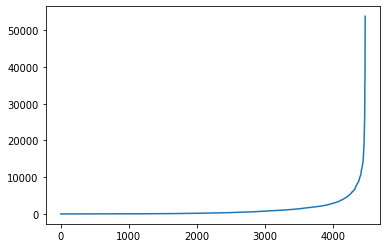

4473
s_4 =  242
s_3 =  979
s_2 =  1570
s_1 =  1682


In [118]:
from matplotlib import pyplot as plt

all_data_jumlah.sort()

plt.plot(all_data_jumlah)
plt.show()
print(len(all_data_jumlah))
print('s_4 = ', len(more_than_fivek))   #jumlah data yang jumlah pembeliannya di atas 5000 pcs
print('s_3 = ', len(more_than_k))       #jumlah data yang jumlah pembeliannya di antara 1000 - 5000 pcs
print('s_2 = ', len(less_than_k))       #jumlah data yang jumlah pembeliannya di antara 100 - 1000 pcs
print('s_1 = ', len(less_than_hundred)) #jumlah data yang jumlah pembeliannya di bawah 100 pcs

In [119]:
# and the least one
jumlah_minimal = 100
counter = 0
indexes = []
for index_data, data in enumerate(dataset_grouped_SKU['Jumlah']):
    if data < 100 and data >= 0:
        jumlah_minimal = data
        index_least_sold = index_data
        counter +=1
        if data == 0:
            indexes.append(index_data)
        continue

    elif data < jumlah_minimal and data >= 0:
        jumlah_minimal = data
        index_least_sold = index_data
        counter +=1
        if data == 0:
            indexes.append(index_data)
        continue
    else:
        continue
        
print('barang_least_sold = ', dataset_grouped_SKU.iloc[index_least_sold])
print('sejumlah = ', jumlah_minimal)
print(indexes)

barang_least_sold =  Jumlah                0.0
Harga_Satuan      12552.8
Kode_Pelanggan        0.0
Name: (unspecified, unspecified), dtype: float64
sejumlah =  0.0
[105, 1095, 1109, 2424, 2438, 2862, 3509, 3828, 4105, 4633, 4795, 4915, 5128, 5628]


In [121]:
# barang yang perlu di'ignore' karena jumlah penjualannya tidak maksimal
# terdapat barang yang berisi null pada Kode_Barang dan Barang, row terkait akan di drop karena dianggap sebagai data input yang keliru 
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(dataset_grouped_SKU.iloc[indexes])

                                                 Jumlah  Harga_Satuan  \
Kode_Barang Barang                                                      
16207B      unspecified                             0.0          0.00   
21655       HANGING RIDGE GLASS T-LIGHT HOLDER      0.0          8.45   
21667       GLASS CAKE COVER AND PLATE              0.0         29.90   
22823       test                                    0.0          0.00   
22833       unspecified                             0.0          0.00   
23135       unspecified                             0.0          0.00   
35597D      unspecified                             0.0          0.00   
47566B      incorrectly credited C550456 see 47     0.0          0.00   
79323B      BLACK CHERRY LIGHTS                     0.0         20.25   
84857C      unspecified                             0.0          0.00   
84989A      unspecified                             0.0          0.00   
85047       WHITE BEADED GARLAND STRING 20LIGHT    

As They never been sold, There are at least 3 items that considered to be ignored:
1.   WHITE BEADED GARLAND STRING 20LIGHT
2.   BLACK CHERRY LIGHTS 
3.   GLASS CAKE COVER AND PLATE
4.   HANGING RIDGE GLASS T-LIGHT HOLDER





# **2. Top Sales by Nation**

In [128]:
# top sales

dataset['Total'] = dataset['Jumlah']*dataset['Harga_Satuan']
dataset_grouped_nation = dataset.groupby(['Negara'], as_index=False).sum()
dataset_grouped_nation.sort_values(by=['Total'], ascending=False)

,Negara,Jumlah,Harga_Satuan,Kode_Pelanggan,Total
36,United Kingdom,4234487.0,2.232103e+06,5.574351e+09,8.130586e+06
24,Netherlands,198340.0,6.472410e+03,3.395805e+07,2.832391e+05
10,EIRE,140493.0,4.834104e+04,1.095540e+08,2.616433e+05
14,Germany,116832.0,3.757960e+04,1.194796e+08,2.207609e+05
13,France,110089.0,4.299335e+04,1.072442e+08,1.970705e+05
0,Australia,81613.0,4.043010e+03,1.559369e+07,1.352937e+05
33,Switzerland,30161.0,6.786620e+03,2.363966e+07,5.616383e+04
31,Spain,26585.0,1.259616e+04,3.242539e+07,5.461726e+04
3,Belgium,23094.0,7.491940e+03,2.560652e+07,4.072898e+04
32,Sweden,35349.0,1.801100e+03,6.742637e+06,3.637415e+04


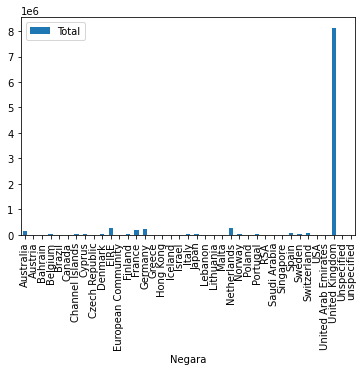

In [145]:
import matplotlib.pyplot as plt

dataset_grouped_nation.plot(x="Negara", y=["Total"], kind="bar")

# **Customer Segmentation by Nation**

In [147]:
dataset_grouped_nation.head()

,Negara,Jumlah,Harga_Satuan,Kode_Pelanggan,Total
0,Australia,81613.0,4043.01,15593688.0,135293.71
1,Austria,4809.0,1698.55,4996313.0,10133.98
2,Bahrain,260.0,86.57,210027.0,548.40
3,Belgium,23094.0,7491.94,25606521.0,40728.98
4,Brazil,356.0,142.60,408608.0,1143.60


In [180]:
train_data = dataset_grouped_nation.copy()
train_data = train_data.drop('Kode_Pelanggan', 1)
train_data = train_data.drop('Harga_Satuan', 1)
train_data = train_data.drop('Negara', 1)

# filtering negative values as it multimeaning
train_data = train_data[(train_data['Jumlah']>=0) | (train_data['Total']>=0)]

train_data.tail()

,Jumlah,Total
34,1034.0,1.730920e+03
35,970.0,1.877080e+03
36,4234487.0,8.130586e+06
37,3298.0,4.746650e+03
38,0.0,0.000000e+00


In [181]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_data = ss.fit_transform(train_data)
train_data = pd.DataFrame(train_data,columns=['Jumlah','Total'])

train_data

,Jumlah,Total
0,-0.075155,-0.088186
1,-0.190304,-0.185910
2,-0.197124,-0.193395
3,-0.162890,-0.162022
4,-0.196980,-0.192930
5,-0.193428,-0.191012
6,-0.183406,-0.178245
7,-0.188184,-0.183835
8,-0.196626,-0.193270
9,-0.185346,-0.179249


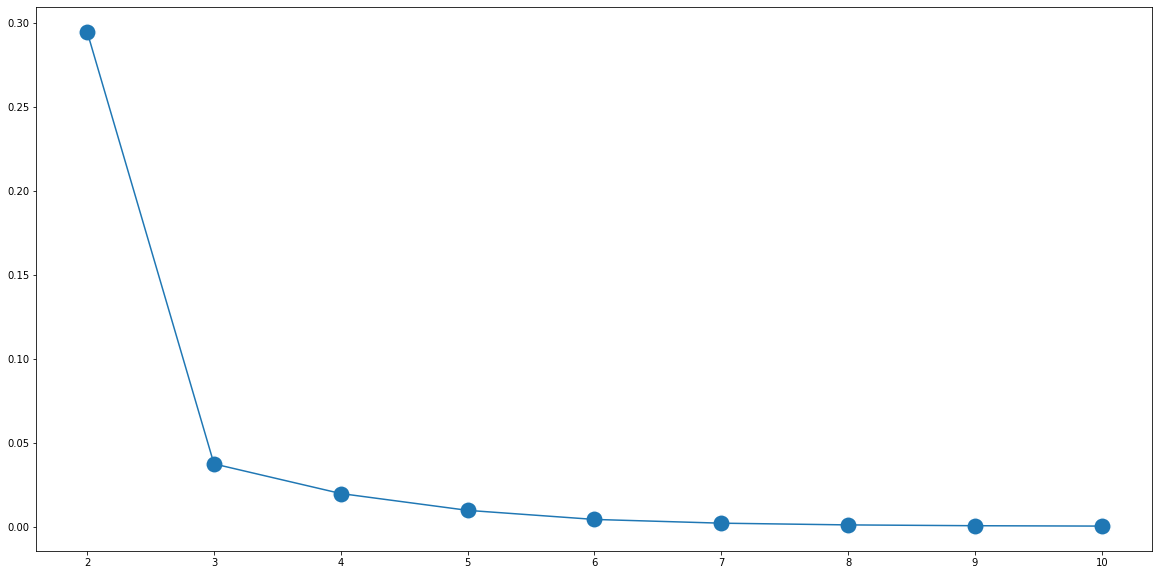

In [182]:
import seaborn as sns
from sklearn.cluster import KMeans
inertias = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(train_data.values)
    inertias.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
sns.lineplot(x=range(2, 11), y=inertias)
sns.scatterplot(x=range(2, 11), y=inertias, s=300)

**We find that n-best cluster to cluster is 3, then...**

In [188]:
kmeans = KMeans(n_clusters=3, random_state=32)
kmeans.fit(train_data.values)
train_data['Klaster'] = kmeans.labels_
print(train_data.head())
print('\n===================================\n')
print(train_data['Klaster'].value_counts())

     Jumlah     Total  Klaster
0 -0.075155 -0.088186        2
1 -0.190304 -0.185910        0
2 -0.197124 -0.193395        0
3 -0.162890 -0.162022        0
4 -0.196980 -0.192930        0


0    33
2     5
1     1
Name: Klaster, dtype: int64


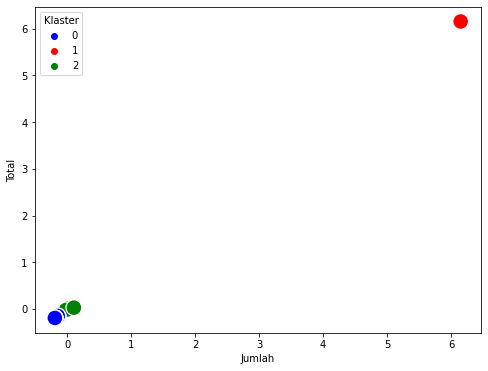

In [191]:
fig, ax = plt.subplots(figsize=(8,6))

#plotting the clusters
sns.scatterplot(
    x="Jumlah", y="Total",
    hue="Klaster",
    data=train_data,
    palette=['blue','red','green'],
    s=250,
    ax=ax
)

# **Hidden Insight**

In [196]:
## LOSS
data_neg = dataset[dataset['Total'] <= 0 ]
data_pos = dataset[dataset['Total'] > 0 ]

print(len(data_pos), len(data_neg))
print(data_pos.head())

524153 17756
  Kode_Bayar Kode_Barang                               Barang  Jumlah  \
0     536365      85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.0   
1     536365       71053                  WHITE METAL LANTERN     6.0   
2     536365      84406B       CREAM CUPID HEARTS COAT HANGER     8.0   
3     536365      84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.0   
4     536365      84029E       RED WOOLLY HOTTIE WHITE HEART.     6.0   

  Tanggal_Transaksi  Harga_Satuan  Kode_Pelanggan          Negara  Total  
0    12/1/2010 8:26          2.55         17850.0  United Kingdom  15.30  
1    12/1/2010 8:26          3.39         17850.0  United Kingdom  20.34  
2    12/1/2010 8:26          2.75         17850.0  United Kingdom  22.00  
3    12/1/2010 8:26          3.39         17850.0  United Kingdom  20.34  
4    12/1/2010 8:26          3.39         17850.0  United Kingdom  20.34  


In [205]:
print(data_neg['Total'].values.sum())
print(data_pos['Total'].values.sum()) 
print(abs(data_neg['Total'].values.sum())*100/data_pos['Total'].values.sum())

-749697.24
10430980.793999996
7.187217144827199
